<a href="https://colab.research.google.com/github/Ihalagedara/intrudion-detection-systen-using-SDN/blob/main/nsl_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
'''
label = pd.Series(['label'], index=[41])
titles = titles[0].append(label)
#df_train.columns = titles.to_list()
#df_train = df_train.drop(['num_outbound_cmds'],axis=1)
df_train_original = df_train
df_test.columns = titles.to_list()
df_test = df_test.drop(['num_outbound_cmds'],axis=1)
df_test_original = df_test
'''

"\nlabel = pd.Series(['label'], index=[41])\ntitles = titles[0].append(label)\n#df_train.columns = titles.to_list()\n#df_train = df_train.drop(['num_outbound_cmds'],axis=1)\ndf_train_original = df_train\ndf_test.columns = titles.to_list()\ndf_test = df_test.drop(['num_outbound_cmds'],axis=1)\ndf_test_original = df_test\n"

In [4]:
titles

,0,1
0,duration,continuous
1,protocol_type,symbolic
2,service,symbolic
3,flag,symbolic
4,src_bytes,continuous
5,dst_bytes,continuous
6,land,continuous
7,wrong_fragment,continuous
8,urgent,continuous
9,hot,continuous


In [5]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [7]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,unknown
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,unknown


In [8]:
df_test["label"].unique()

array(['dos', 'normal', 'unknown', 'r2l', 'probe', 'u2r'], dtype=object)

In [9]:
'''
for i in range(len(df_train)):
  for j in range(len(attack)):
    if df_train["label"][i] == attack[0][j]:
      df_train["label"][i]=attack[1][j]
'''

'\nfor i in range(len(df_train)):\n  for j in range(len(attack)):\n    if df_train["label"][i] == attack[0][j]:\n      df_train["label"][i]=attack[1][j]\n'

In [10]:
#df_train.to_csv('/content/drive/MyDrive/FYP ML/DATA/train_imp.csv', index=True)

In [11]:
'''
for i in range(len(df_test)):
  for j in range(len(attack)):
    if df_test_original["label"][i] == attack[0][j]:
      df_test["label"][i]=attack[1][j]
'''

'\nfor i in range(len(df_test)):\n  for j in range(len(attack)):\n    if df_test_original["label"][i] == attack[0][j]:\n      df_test["label"][i]=attack[1][j]\n'

In [12]:
len(df_test)

22543

In [13]:
'''
for i in range(len(df_train_original)):
  if df_test_original["label"][i] == "dos" or df_test_original["label"][i] == "normal" or df_test_original["label"][i] == "r2l" or df_test_original["label"][i] == "u2r" or df_test_original["label"][i] == "probe":
    df_test["label"][i] = df_test["label"][i]
  else:
    df_test["label"][i] = "unknown"
'''

'\nfor i in range(len(df_train_original)):\n  if df_test_original["label"][i] == "dos" or df_test_original["label"][i] == "normal" or df_test_original["label"][i] == "r2l" or df_test_original["label"][i] == "u2r" or df_test_original["label"][i] == "probe":\n    df_test["label"][i] = df_test["label"][i]\n  else:\n    df_test["label"][i] = "unknown"\n'

In [14]:
#df_test.to_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index=True)

In [15]:
df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [16]:
df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [17]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [18]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,unknown
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,unknown


In [19]:
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)


In [20]:
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)

In [21]:
df_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


(array([9710.,    0., 5741.,    0., 2199.,    0., 1106.,    0.,   37.,
        3750.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

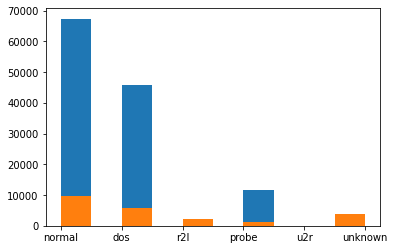

In [22]:
plt.hist(df_train["label"])
plt.hist(df_test["label"])

In [23]:
for i in range(len(df_train)):
  if df_train["label"][i] == "normal":
    df_train["label"][i] = 0
  elif df_train["label"][i] == "dos":
    df_train["label"][i] = 1
  elif df_train["label"][i] == "r2l":
    df_train["label"][i] = 2
  elif df_train["label"][i] == "probe":
    df_train["label"][i] = 3
  elif df_train["label"][i] == "u2r":
    df_train["label"][i] = 4
  else:
    df_train["label"][i] = 5


<ipython-input-23-149f12b43a20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"][i] = 0
<ipython-input-23-149f12b43a20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"][i] = 1
<ipython-input-23-149f12b43a20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"][i] = 2
<ipython-input-23-149f12b43a20>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [24]:
df_train["label"].unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

In [25]:
for i in range(len(df_test)):
  if df_test["label"][i] == "normal":
    df_test["label"][i] = 0
  elif df_test["label"][i] == "dos":
    df_test["label"][i] = 1
  elif df_test["label"][i] == "r2l":
    df_test["label"][i] = 2
  elif df_test["label"][i] == "probe":
    df_test["label"][i] = 3
  elif df_test["label"][i] == "u2r":
    df_test["label"][i] = 4
  else:
    df_test["label"][i] = 5

<ipython-input-25-237124ac8ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["label"][i] = 1
<ipython-input-25-237124ac8ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["label"][i] = 0
<ipython-input-25-237124ac8ebc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["label"][i] = 5
<ipython-input-25-237124ac8ebc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [26]:
df_test["label"].unique()

array([1, 0, 5, 2, 3, 4], dtype=object)

In [27]:
df_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [28]:
X_trainscale = df_train[df_train.columns[:-1]].values
y_train = df_train[df_train.columns[-1]].values.astype('int')
X_testscale = df_test[df_test.columns[:-1]].values
y_test = df_test[df_test.columns[-1]].values.astype('int')

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainscale)
X_test = scaler.fit_transform(X_testscale)

In [30]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)

In [31]:
##train, X_train, y_train = scale_dataset(df_train, oversample=True)
#test, X_test, y_test = scale_dataset(df_test, oversample=False)

In [32]:
y_test

array([1, 1, 0, ..., 5, 5, 5])

In [33]:
#y_train_test = pd.factorize(y_train)
#y_train = y_train_test[0]
#y_test_test = pd.factorize(y_test)
#y_test = y_test_test[0]

In [34]:
y_test

array([1, 1, 0, ..., 5, 5, 5])

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.93      0.46      9710
           1       0.90      0.92      0.91      9710
           2       0.06      0.00      0.01      9710
           3       0.76      0.74      0.75      9710
           4       0.98      0.18      0.30      9710
           5       0.96      0.67      0.79      9710

    accuracy                           0.57     58260
   macro avg       0.66      0.57      0.54     58260
weighted avg       0.66      0.57      0.54     58260



In [39]:
knn_mae = mean_absolute_error(y_test, y_pred)
knn_mae

1.2194473051836594

In [40]:
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.5721421215242019

In [41]:
num=[]
for i in range(X_test.shape[0]):
    num.append(i+1)

Text(0.5, 0.98, 'KNN')

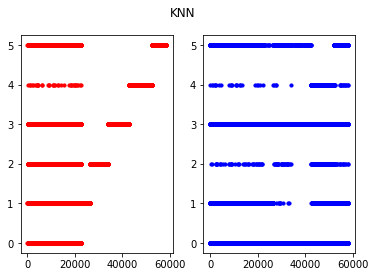

In [42]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("KNN")

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [45]:
nb_y_pred = nb_model.predict(X_test)

In [46]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.17      0.97      0.28      9710
           1       0.61      0.01      0.02      9710
           2       0.01      0.00      0.00      9710
           3       0.00      0.00      0.00      9710
           4       0.00      0.00      0.00      9710
           5       0.00      0.00      0.00      9710

    accuracy                           0.16     58260
   macro avg       0.13      0.16      0.05     58260
weighted avg       0.13      0.16      0.05     58260



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
nb_mae = mean_absolute_error(y_test, nb_y_pred)
nb_mae

2.477583247511157

In [48]:
nb_acc = accuracy_score(y_test, nb_y_pred)
nb_acc

0.1638516992790937

Text(0.5, 0.98, 'Naive Bayes')

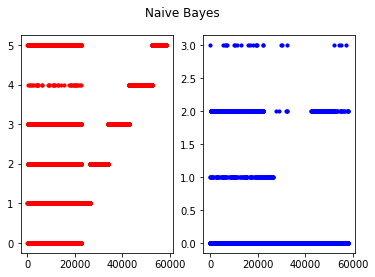

In [49]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,nb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Naive Bayes")

# Log Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
lr_y_pred = lg_model.predict(X_test)

In [53]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      9710
           1       0.71      0.97      0.82      9710
           2       0.65      0.19      0.30      9710
           3       0.70      0.94      0.80      9710
           4       0.65      0.45      0.53      9710
           5       0.75      0.74      0.74      9710

    accuracy                           0.67     58260
   macro avg       0.67      0.67      0.64     58260
weighted avg       0.67      0.67      0.64     58260



In [54]:
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mae

0.8131994507380708

In [55]:
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_acc

0.6749570889117747

Text(0.5, 0.98, 'Log Regression')

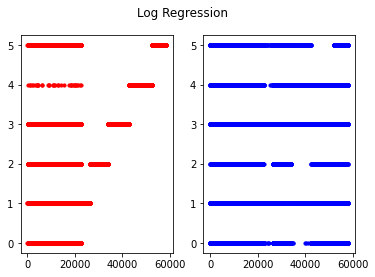

In [56]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

# SVM 
takes time

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [59]:
y_pred = svm_model.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.87      0.53      9710
           1       0.84      0.97      0.90      9710
           2       0.18      0.02      0.03      9710
           3       0.72      0.86      0.78      9710
           4       0.82      0.29      0.43      9710
           5       0.86      0.79      0.83      9710

    accuracy                           0.63     58260
   macro avg       0.63      0.63      0.58     58260
weighted avg       0.63      0.63      0.58     58260



# XGBoost

In [61]:
import xgboost as xgb

In [62]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [63]:
xgb_y_pred = xgb_model.predict(X_test)

In [64]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.34      0.93      0.50      9710
           1       0.72      0.83      0.77      9710
           2       0.53      0.06      0.11      9710
           3       0.61      0.86      0.71      9710
           4       0.97      0.03      0.06      9710
           5       0.88      0.50      0.64      9710

    accuracy                           0.54     58260
   macro avg       0.67      0.54      0.47     58260
weighted avg       0.67      0.54      0.47     58260



In [65]:
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mae

1.193288705801579

In [66]:
xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_acc

0.5356676965327841

Text(0.5, 0.98, 'XGBoost')

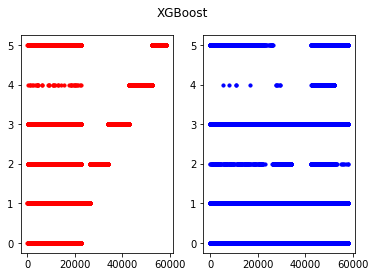

In [67]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

# RandomForest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
rf_y_pred = rf_model.predict(X_test)

In [71]:
#print(classification_report(y_test, rf_y_pred))

In [72]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mae

1.596315139031926

In [73]:
'''
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_acc
'''

'\nrf_acc = accuracy_score(y_test, rf_y_pred)\nrf_acc\n'

Text(0.5, 0.98, 'Random Forest')

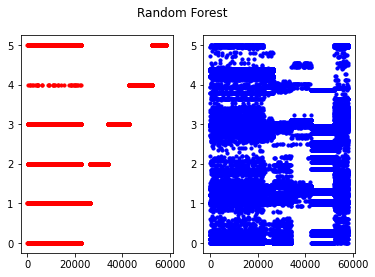

In [74]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,rf_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Random Forest")

# ANN

In [75]:
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [76]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
ann_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
12627/12627 [==============================] - 29s 2ms/step - loss: -9441678.0000 - accuracy: 0.1668
Epoch 2/10
12627/12627 [==============================] - 28s 2ms/step - loss: -98760656.0000 - accuracy: 0.1667
Epoch 3/10
12627/12627 [==============================] - 30s 2ms/step - loss: -358499520.0000 - accuracy: 0.1667
Epoch 4/10
12627/12627 [==============================] - 29s 2ms/step - loss: -873975232.0000 - accuracy: 0.1667
Epoch 5/10
12627/12627 [==============================] - 30s 2ms/step - loss: -1726279552.0000 - accuracy: 0.1667
Epoch 6/10
12627/12627 [==============================] - 30s 2ms/step - loss: -2998791424.0000 - accuracy: 0.1667
Epoch 7/10
12627/12627 [==============================] - 29s 2ms/step - loss: -4775819264.0000 - accuracy: 0.1667
Epoch 8/10
12627/12627 [==============================] - 30s 2ms/step - loss: -7133423104.0000 - accuracy: 0.1667
Epoch 9/10
12627/12627 [==============================] - 29s 2ms/step - loss: -1015303

In [78]:
ann_y_pred = ann_model.predict(X_test)

1821/1821 [==============================] - 3s 2ms/step


In [79]:
ann_mae = mean_absolute_error(y_test, ann_y_pred)
ann_mae

1.8333333333333333

In [80]:
ann_acc = accuracy_score(y_test, ann_y_pred)
ann_acc

0.16666666666666666

Text(0.5, 0.98, 'ANN')

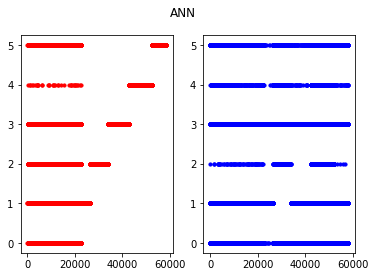

In [81]:
plt.subplot(121)
plt.scatter(num,y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("ANN")